Error relativo mínimo: 0.0
Error relativo máximo: 3.8967738548857203e+146
Error relativo promedio: 3.572990949681706e+144


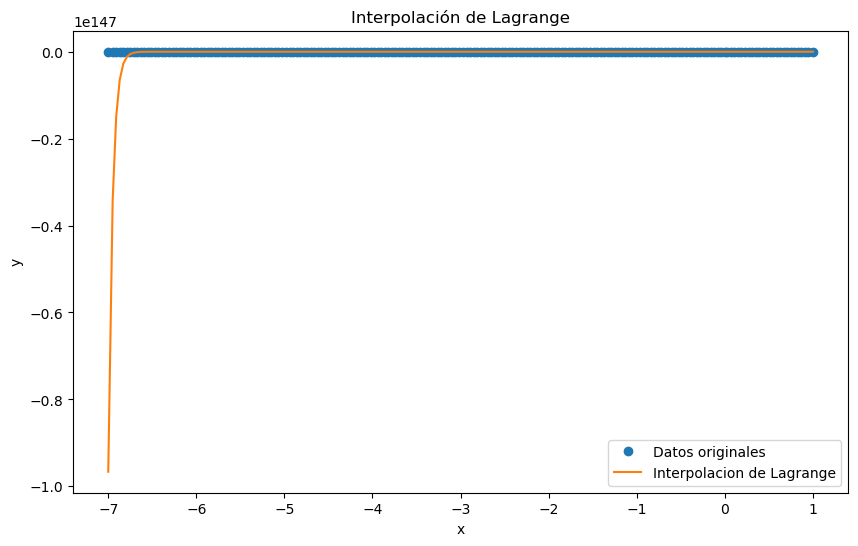

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

datos = [
    (-7.0, -2.48), (-6.95, 5.21), (-6.91, 5.79), (-6.87, 7.32), (-6.83, 0.13), 
    (-6.79, 7.58), (-6.75, 3.38), (-6.71, 3.44), (-6.67, -4.62), (-6.63, -0.14), 
    (-6.59, 4.26), (-6.55, 2.5), (-6.51, 3.3), (-6.47, 1.35), (-6.43, 3.87), 
    (-6.39, -2.44), (-6.35, 2.17), (-6.31, 1.45), (-6.27, 0.82), (-6.23, 3.9), 
    (-6.19, 2.21), (-6.15, 6.16), (-6.11, 4.64), (-6.07, 0.66), (-6.03, -1.46), 
    (-5.99, 3.3), (-5.95, 0.65), (-5.91, 5.65), (-5.87, 9.45), (-5.83, -2.37), 
    (-5.79, 1.8), (-5.75, 1.8), (-5.71, 6.72), (-5.67, -1.53), (-5.63, 9.06), 
    (-5.59, 0.53), (-5.55, -5.18), (-5.51, 3.49), (-5.47, 7.74), (-5.43, 4.23), 
    (-5.39, 2.7), (-5.35, 2.96), (-5.31, 1.15), (-5.27, 4.79), (-5.23, 2.5), 
    (-5.19, 0.83), (-5.15, -6.04), (-5.11, -6.16), (-5.07, -2.36), (-5.03, -2.23), 
    (-4.98, -0.9), (-4.94, 2.89), (-4.9, -2.34), (-4.86, 0.3), (-4.82, -2.89), 
    (-4.78, 0.66), (-4.74, 1.0), (-4.7, 5.26), (-4.66, -0.96), (-4.62, 0.72), 
    (-4.58, 6.62), (-4.54, 3.97), (-4.5, -1.09), (-4.46, 6.13), (-4.42, 4.12), 
    (-4.38, 6.75), (-4.34, 9.89), (-4.3, 6.8), (-4.26, 3.55), (-4.22, 1.62), 
    (-4.18, 2.22), (-4.14, 4.67), (-4.1, 3.87), (-4.06, -0.6), (-4.02, 0.07), 
    (-3.98, 1.0), (-3.94, 2.38), (-3.9, 9.58), (-3.86, 5.06), (-3.82, -1.58), 
    (-3.78, 4.79), (-3.74, 0.26), (-3.7, 10.75), (-3.66, 6.23), (-3.62, 4.65), 
    (-3.58, 1.59), (-3.54, 6.79), (-3.5, 8.71), (-3.46, 2.85), (-3.42, 7.05), 
    (-3.38, 7.83), (-3.34, 4.57), (-3.3, 5.43), (-3.26, 2.97), (-3.22, 2.61), 
    (-3.18, 2.28), (-3.14, 7.98), (-3.1, 10.59), (-3.06, 9.46), (-3.02, 6.12), 
    (-2.97, 3.57), (-2.93, 11.94), (-2.89, 8.14), (-2.85, 12.12), (-2.81, 9.21), 
    (-2.77, 9.43), (-2.73, 9.97), (-2.69, 8.24), (-2.65, 7.33), (-2.61, 7.23), 
    (-2.57, 12.07), (-2.53, 9.58), (-2.49, 12.35), (-2.45, 12.03), (-2.41, 7.5), 
    (-2.37, 14.97), (-2.33, 8.77), (-2.29, 3.7), (-2.25, 6.82), (-2.21, 11.47), 
    (-2.17, 11.9), (-2.13, 11.18), (-2.09, 14.01), (-2.05, 12.55), (-2.01, 18.89), 
    (-1.97, 13.24), (-1.93, 10.52), (-1.89, 6.87), (-1.85, 14.16), (-1.81, 16.5), 
    (-1.77, 14.6), (-1.73, 11.18), (-1.69, 11.64), (-1.65, 18.63), (-1.61, 19.29), 
    (-1.57, 19.24), (-1.53, 16.48), (-1.49, 15.7), (-1.45, 13.1), (-1.41, 14.45), 
    (-1.37, 13.84), (-1.33, 16.02), (-1.29, 17.87), (-1.25, 27.07), (-1.21, 24.01), 
    (-1.17, 22.61), (-1.13, 24.49), (-1.09, 21.74), (-1.05, 19.06), (-1.01, 15.34), 
    (-0.96, 19.73), (-0.92, 17.71), (-0.88, 23.67), (-0.84, 16.43), (-0.8, 21.77), 
    (-0.76, 18.92), (-0.72, 32.27), (-0.68, 19.22), (-0.64, 26.76), (-0.6, 22.83), 
    (-0.56, 23.2), (-0.52, 25.89), (-0.48, 23.29), (-0.44, 30.18), (-0.4, 28.02), 
    (-0.36, 24.06), (-0.32, 24.59), (-0.28, 23.46), (-0.24, 31.07), (-0.2, 31.56), 
    (-0.16, 27.0), (-0.12, 31.62), (-0.08, 35.5), (-0.04, 32.82), (-0.0, 28.65), 
    (0.03, 36.6), (0.07, 33.92), (0.11, 35.97), (0.15, 30.86), (0.19, 31.47), 
    (0.23, 38.52), (0.27, 32.5), (0.31, 36.67), (0.35, 31.59), (0.39, 43.82), 
    (0.43, 37.48), (0.47, 34.57), (0.51, 33.19), (0.55, 37.98), (0.59, 42.94), 
    (0.63, 37.8), (0.67, 43.53), (0.71, 34.77), (0.75, 33.96), (0.79, 34.17), 
    (0.83, 40.71), (0.87, 40.09), (0.91, 45.15), (0.95, 46.26), (1.0, 40.69)
]
x = np.array([p[0] for p in datos])
y = np.array([p[1] for p in datos])
# interpolación usando el método de Lagrange
polinomio = lagrange(x, y)

# Calcular los valores interpolados
y_interpolado = polinomio(x)

# Calcular el error relativo para cada punto
errores_relativos = np.abs((y - y_interpolado) / y)

# mínimo, máximo y promedio de los errores relativos
error_min = np.min(errores_relativos)
error_max = np.max(errores_relativos)
error_promedio = np.mean(errores_relativos)

print(f"Error relativo mínimo: {error_min}")
print(f"Error relativo máximo: {error_max}")
print(f"Error relativo promedio: {error_promedio}")
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos originales')
plt.plot(x, y_interpolado, '-', label='Interpolacion de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación de Lagrange')
plt.show()